In [254]:

# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [255]:
df=pd.read_csv('train_LZdllcl.csv')

In [256]:
dft=pd.read_csv('test_2umaH9m.csv')

In [257]:
df.shape

(54808, 14)

In [258]:
dft.shape

(23490, 13)

In [259]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [260]:
dft.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [262]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [263]:
pd.isnull(df).sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [264]:
pd.isnull(dft).sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [265]:
df.duplicated().sum()

0

In [266]:
dft.duplicated().sum()

0

In [267]:
df.dropna(inplace=True)

In [268]:
dft.dropna(inplace=True)

In [269]:
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers
for column in df.select_dtypes(include=['number']):
  outliers = detect_outliers_iqr(df[column])
  if not outliers.empty:
    print(f"Outliers in '{column}': {outliers.tolist()}")

Outliers in 'no_of_trainings': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 2, 2, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 6, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 3,

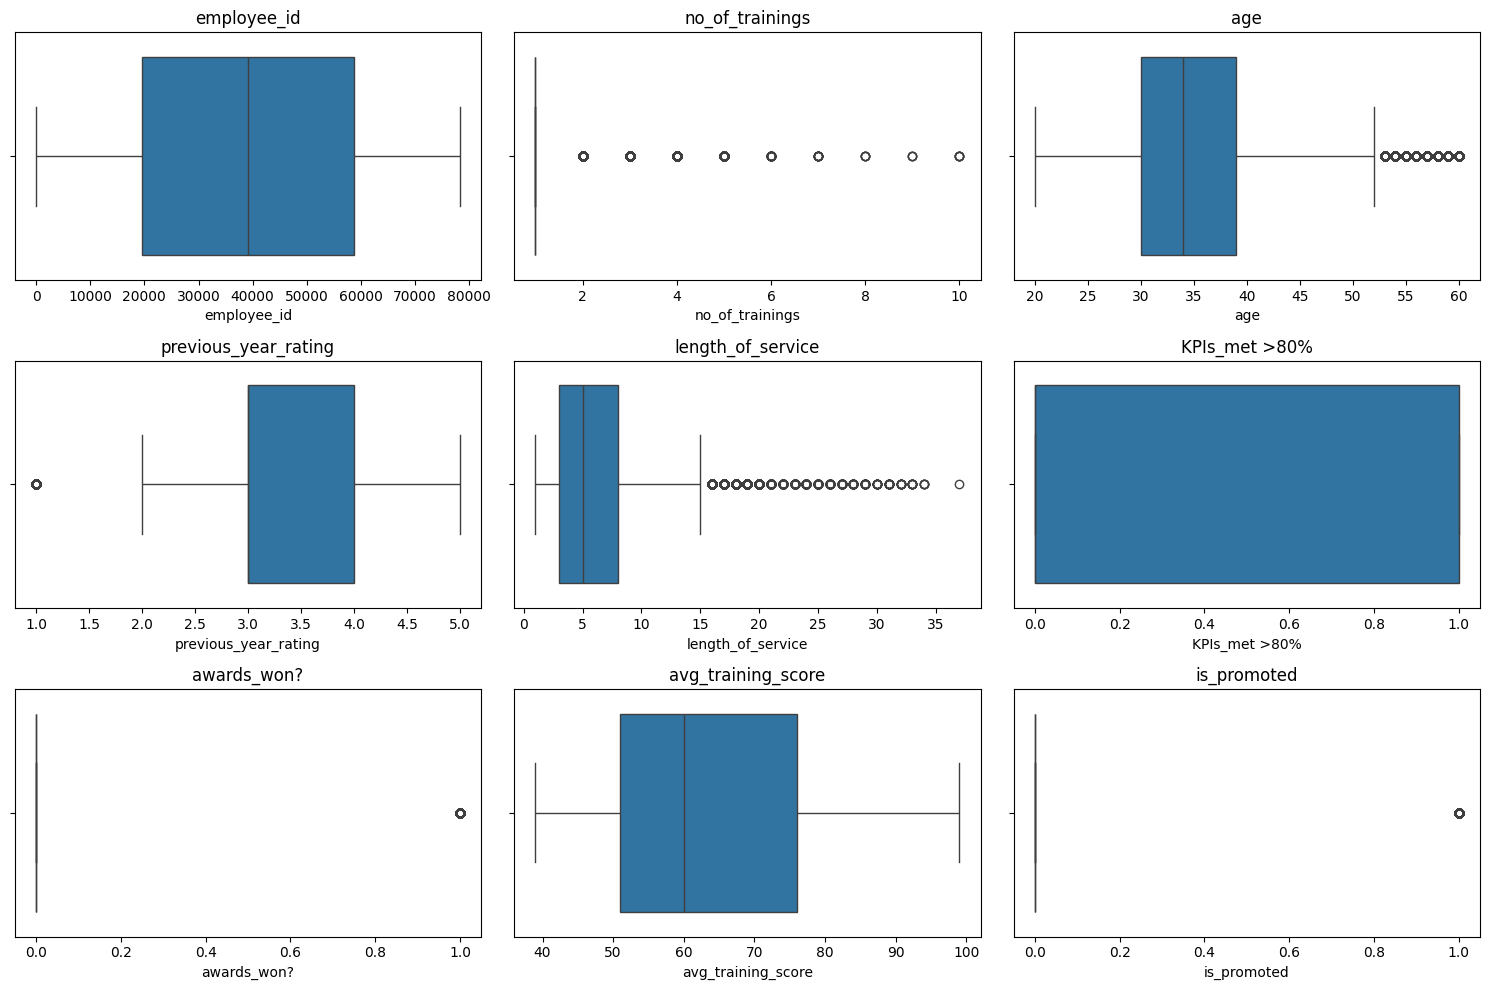

In [270]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

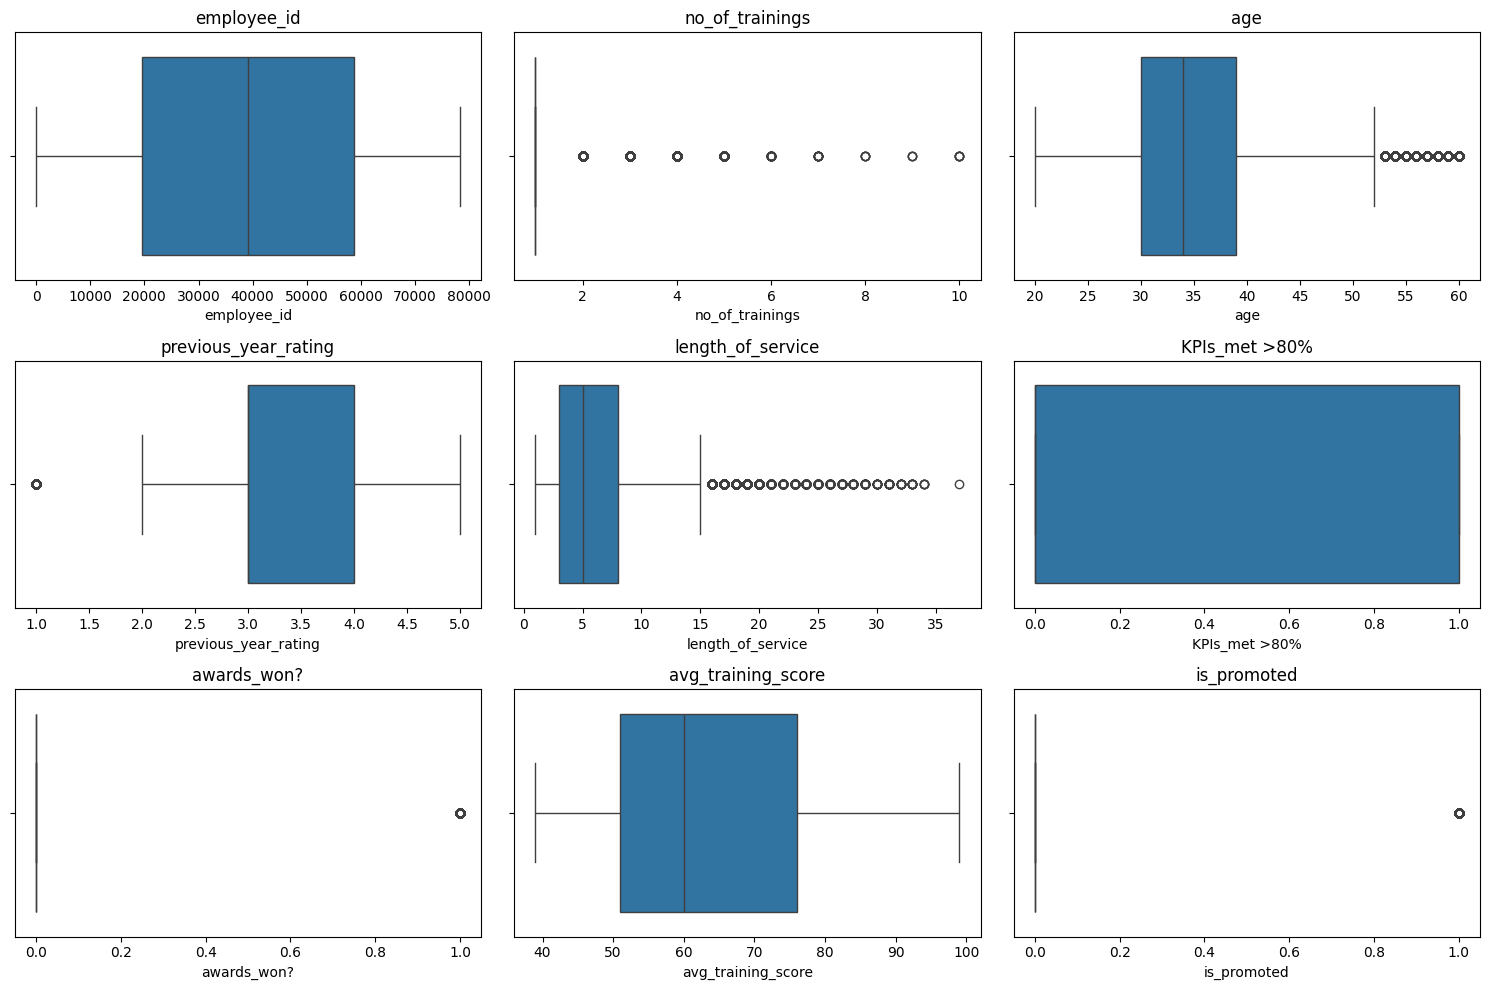

In [271]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

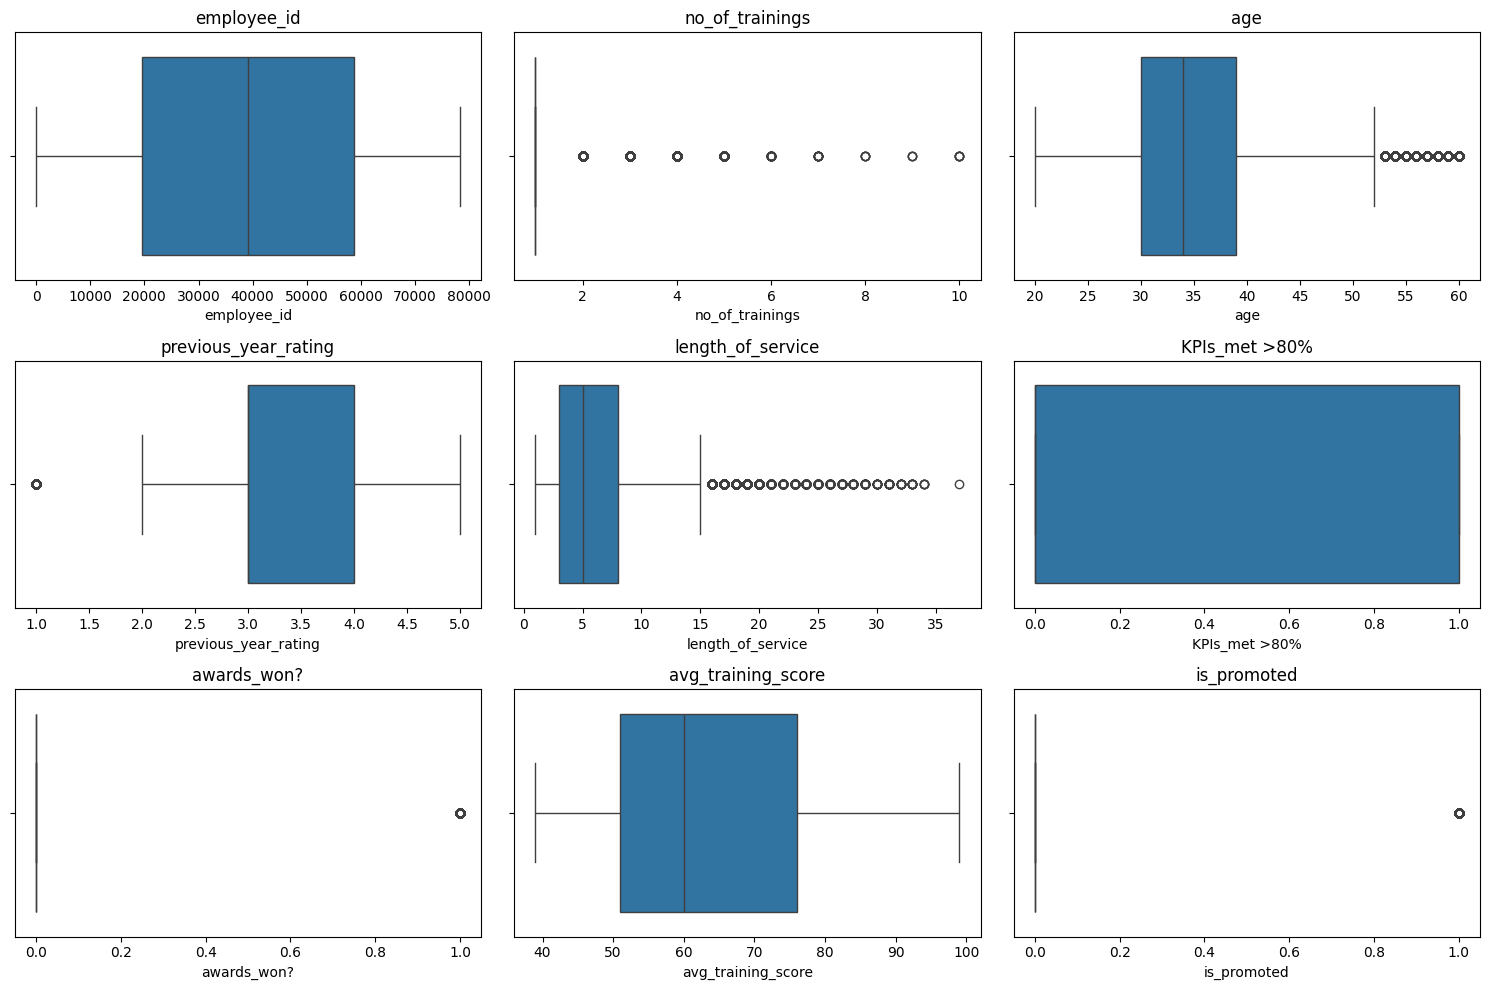

In [272]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(x=df[column])
  plt.title(column)
plt.tight_layout()
plt.show()

In [273]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [274]:
dft.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

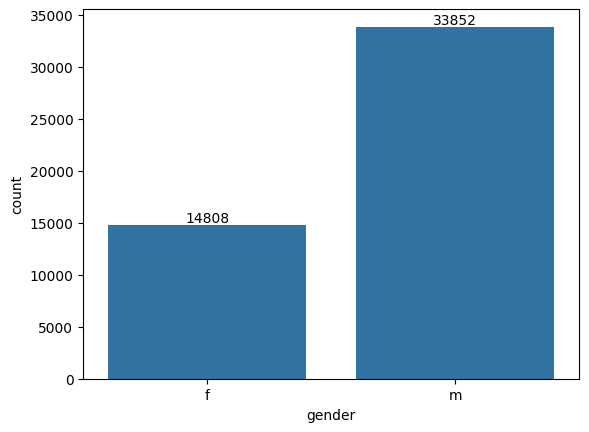

In [275]:
ax = sns.countplot(x = 'gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

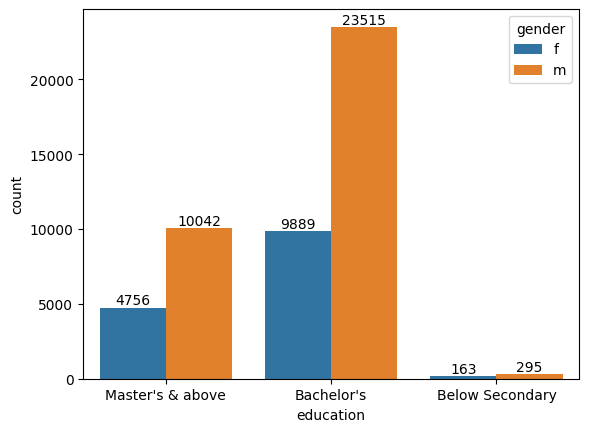

In [276]:
ax = sns.countplot(data = df, x = 'education', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

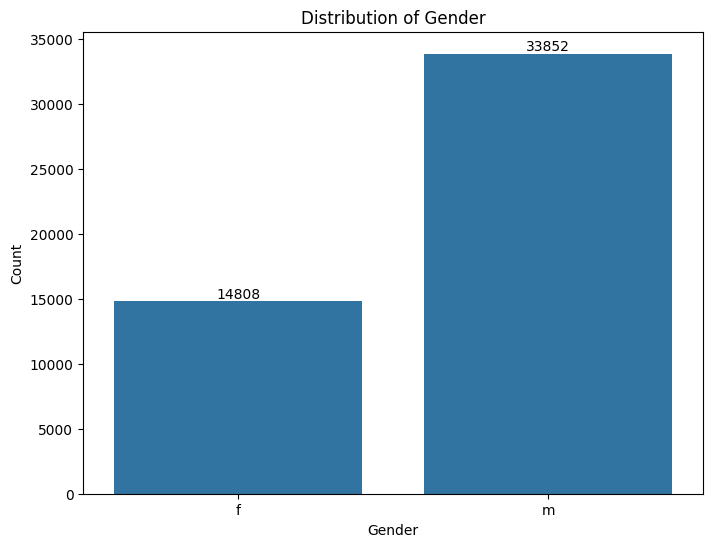

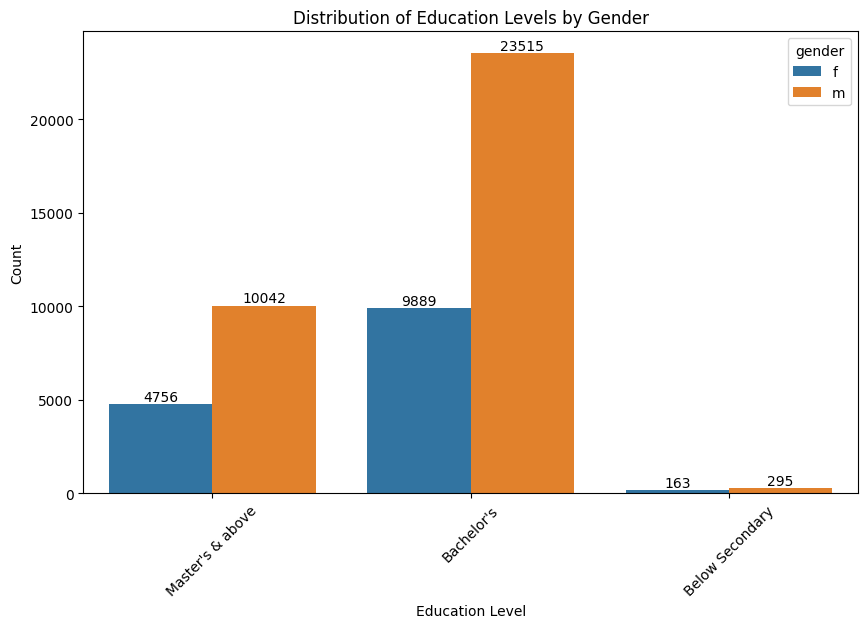

In [277]:
# prompt: Modeling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

# import python libraries

%matplotlib inline



# Gender distribution
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
ax = sns.countplot(x='gender', data=df)
ax.set_title('Distribution of Gender') # Add a title
ax.set_xlabel('Gender') # Add x-axis label
ax.set_ylabel('Count') # Add y-axis label
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Education level distribution by gender
plt.figure(figsize=(10, 6))  # Adjust figure size
ax = sns.countplot(data=df, x='education', hue='gender')
ax.set_title('Distribution of Education Levels by Gender') # Add a title
ax.set_xlabel('Education Level') # Add x-axis label
ax.set_ylabel('Count') # Add y-axis label
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels if needed
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()



In [278]:
# prompt: min max scaling

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Display the scaled DataFrame
print(df.head())


   employee_id         department     region         education gender  \
0     0.835754  Sales & Marketing   region_7  Master's & above      f   
1     0.831960         Operations  region_22        Bachelor's      m   
2     0.095942  Sales & Marketing  region_19        Bachelor's      m   
3     0.032453  Sales & Marketing  region_23        Bachelor's      m   
4     0.625107         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings    age  previous_year_rating  \
0            sourcing         0.000000  0.375                   1.0   
1               other         0.000000  0.250                   1.0   
2            sourcing         0.000000  0.350                   0.5   
3               other         0.111111  0.475                   0.0   
4               other         0.000000  0.625                   0.5   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0           0.194444            1.0          0.0            0.

In [279]:
# prompt: find the best model of df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'target_column' is the name of the target variable column

# Separate features (X) and target variable (y)
X = df.drop('is_promoted', axis=1)  # Replace 'target_column' with the actual name
y = df['is_promoted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}
for name, model in models.items():

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy}")


# Find the best model
best_model = max(results, key=results.get)
print(f"\nThe best model is: {best_model} with accuracy {results[best_model]}")

Logistic Regression accuracy: 0.9370119194410194
Random Forest accuracy: 0.9370119194410194
SVM accuracy: 0.9370119194410194

The best model is: Logistic Regression with accuracy 0.9370119194410194


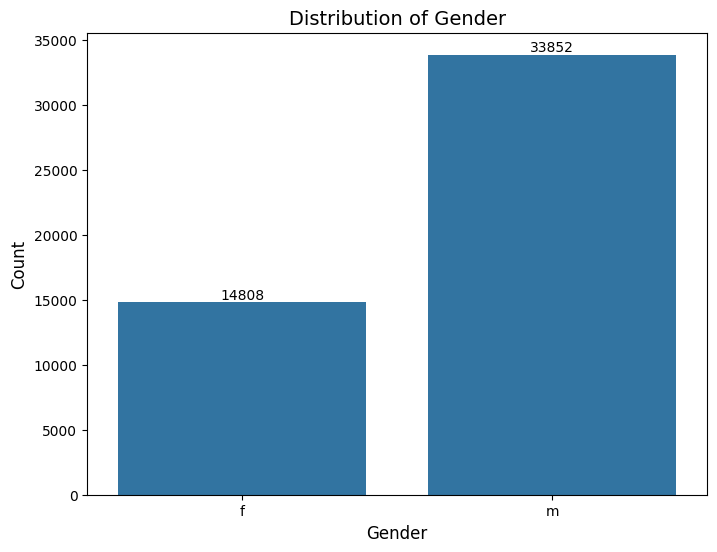

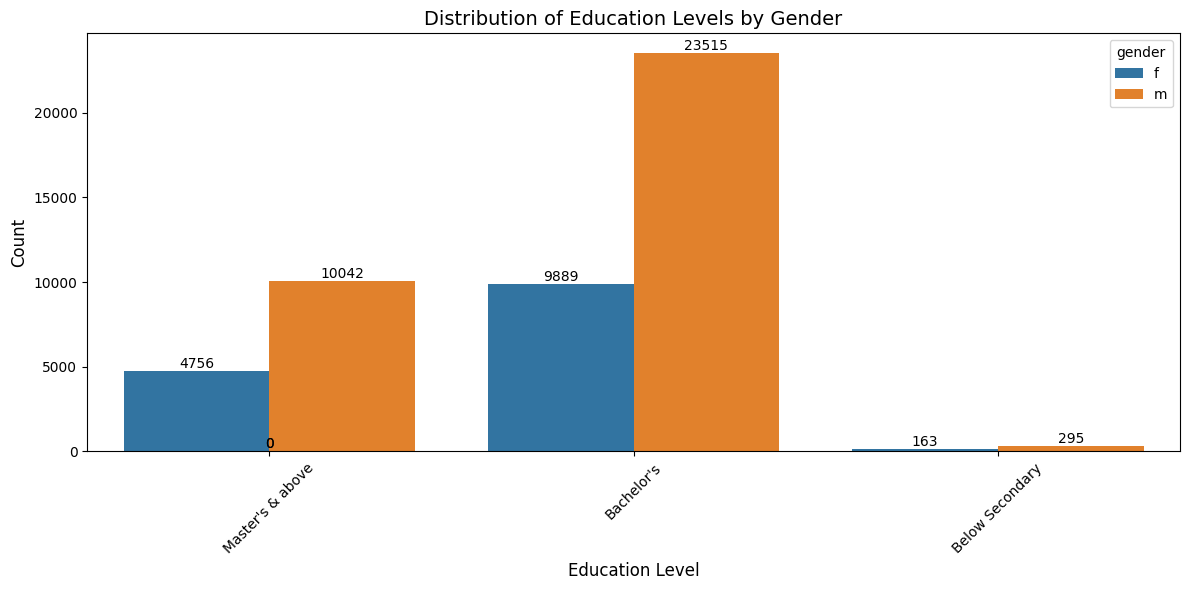

In [280]:
# : fine tubbing


# Fine-tuning visualizations

# Gender distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=df)
ax.set_title('Distribution of Gender', fontsize=14)  # Increased font size
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='both', labelsize=10) # Adjust tick label size

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')  # Improved annotation placement

plt.show()


# Education level distribution by gender
plt.figure(figsize=(12, 6))  # Wider figure for better label readability
ax = sns.countplot(data=df, x='education', hue='gender')
ax.set_title('Distribution of Education Levels by Gender', fontsize=14)
ax.set_xlabel('Education Level', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate and adjust label size
ax.tick_params(axis='y', labelsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [281]:
#  Replace the target column with the prediction value

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Assuming 'df' is your DataFrame and 'target_column' is the name of the target variable column

# Separate features (X) and target variable (y)
X = df.drop('is_promoted', axis=1)  # Replace 'target_column' with the actual name
y = df['is_promoted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# Replace the target column in the test set with the prediction values
X_test['is_promoted'] = y_pred

#Now X_test contains the replaced target column
print(X_test.head())

       employee_id         department     region         education gender  \
27936     0.741701         Technology  region_23        Bachelor's      m   
28570     0.362070         Technology   region_9        Bachelor's      m   
18311     0.753426         Operations  region_29        Bachelor's      m   
46523     0.513723  Sales & Marketing   region_4  Master's & above      m   
26425     0.422072         Operations   region_2        Bachelor's      m   

      recruitment_channel  no_of_trainings    age  previous_year_rating  \
27936               other         0.000000  0.325                  0.50   
28570               other         0.000000  0.350                  0.75   
18311               other         0.111111  0.300                  0.75   
46523               other         0.000000  0.625                  0.50   
26425               other         0.000000  0.425                  0.00   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
27936     

In [285]:
# prompt: X_test  download as csv only employ id andis promoted

# Assuming X_test is already defined as in your provided code
# and y_pred contains the predictions

# Create a new DataFrame with only 'employee_id' and 'is_promoted'
X_test_subset = X_test[['employee_id', 'is_promoted']].copy()

# Convert the DataFrame to a CSV file
X_test_subset.to_csv('X_test_predictions.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('X_test_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [283]:
# Save this newdataset as a csv file  in devic

# Assuming 'X_test' is the DataFrame you want to save
from google.colab import files
X_test.to_csv('newdataset.csv', encoding = 'utf-8-sig')
files.download('newdataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>